In [138]:
# import packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
import xgboost
%matplotlib inline


# import pre-processing modules 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel 
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


# import classifiers
# scale robust
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# scale sensitive
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# import evaluation modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [163]:
test_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/test.csv")
train_set = pd.read_csv(r"C:/Users/Yehonatan/PycharmProject/DS/projects/titanic/ignore/train.csv")
df_original = pd.concat([train_set,test_set], axis=0, ignore_index=True )

df_train = (train_set.copy()).rename(columns=str.lower)
df_test = (test_set.copy()).rename(columns=str.lower)

df = (df_original.copy()).rename(columns=str.lower)


In [ ]:
cabin = df[~df['cabin'].isna()]
cabin_nan =  df[df['cabin'].isna()]
print('df  cabin nans',df['cabin'].isna().sum())

In [165]:
# deal with cabin nan by comparing the ticket number 

for t in range(len(cabin['ticket'])):
    for n in range(len(cabin_nan['ticket'])):
        if cabin['ticket'].iloc[t] == cabin_nan['ticket'].iloc[n] :
           
            index = cabin['passengerid'].iloc[t] - 1    
            index_nan = cabin_nan['passengerid'].iloc[n] - 1 
            if index != index_nan:

                # update the value of cabin_nan in the df
                df.at[index_nan,'cabin'] = df.at[index,'cabin']



cabin_nan =  df[df['cabin'].isna()] # update cabin_nan
print('df cabin nans updated',len(cabin_nan))           
        

df  cabin nans 1014
df cabin nans updated 998


In [212]:
# handle single men and single women in seconde and thied class 

s_t_class_cabin = cabin[cabin['pclass'] != 1] 
single_temp = s_t_class_cabin[s_t_class_cabin['sibsp'] == 0]
single_cabin = single_temp[single_temp['parch'] == 0]

s_t_class_cabin_male = single_cabin[single_cabin['sex'] == 'male']      # single 2 3 class male
s_t_class_cabin_female = single_cabin[single_cabin['sex'] == 'female'] # single 2 3 class female

s_t_class_cabin_nan = cabin_nan[cabin_nan['pclass'] != 1]
single_temp = s_t_class_cabin_nan[s_t_class_cabin_nan['sibsp'] == 0]
single_cabin_nan = single_temp[single_temp['parch'] == 0]

s_t_class_cabin_nan_male = single_cabin_nan[single_cabin_nan['sex'] == 'male']
s_t_class_cabin_nan_female = single_cabin_nan[single_cabin_nan['sex'] == 'female']

# deal with female. compare fare  
#why separated - coz generlizing the cabin nan in male might be different   

for t in range(len(s_t_class_cabin_female)):
    for n in range(len(s_t_class_cabin_nan_female)):
        if s_t_class_cabin_female['fare'].iloc[t] == s_t_class_cabin_nan_female['fare'].iloc[n] :
            
            pclass_cabin = s_t_class_cabin_female['pclass'].iloc[t]              
            pclass_cabin_nan = s_t_class_cabin_nan_female['pclass'].iloc[n]
            index = s_t_class_cabin_female['passengerid'].iloc[t] - 1    
            index_nan = s_t_class_cabin_nan_female['passengerid'].iloc[n] - 1 
            
            if index != index_nan and pclass_cabin == pclass_cabin_nan : # make sure the deduction about cabin doesnt cross pclass

                df.at[index_nan,'cabin'] = df.at[index,'cabin'] # update the value of cabin_nan in the df

cabin_nan =  df[df['cabin'].isna()] # update cabin_nan

# deal with male - too crude to generilze in the same manner of female . loose too much 
# from this point it will be to crude to keep assumin cabin numbers .
# need to divide the existing with cabin numbers into front back and the rest by class single familly etc ... 


In [246]:
t_class_cabin_nan = cabin_nan[cabin_nan['pclass'] == 3]
t_class_cabin_nan.sort_values(by=['fare'],ascending=True)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0000,NaN,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0000,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0000,NaN,S
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0000,NaN,S
912,913,NaN,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
378,379,0.0,3,"Betros, Mr. Tannous",male,20.00,0,0,2648,4.0125,NaN,C
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.00,0,0,345364,6.2375,NaN,S
1024,1025,NaN,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
843,844,0.0,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C
1007,1008,NaN,3,"Thomas, Mr. John",male,NaN,0,0,2681,6.4375,NaN,C


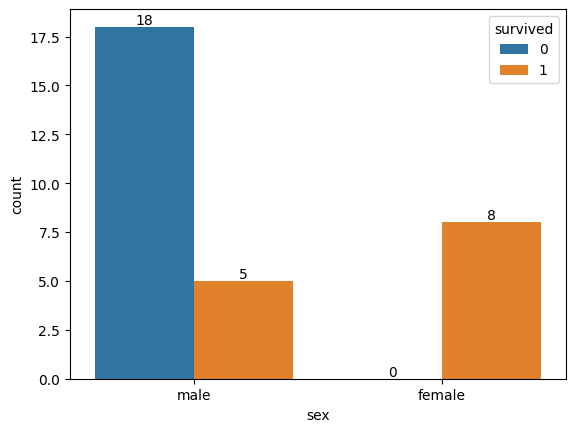

In [263]:
# third class cabin nan
cabin_nan_new =  df_train[df_train['cabin'].isna()]
single_temp = cabin_nan_new[cabin_nan_new['sibsp'] == 0]
single_cabin_nan = single_temp[single_temp['parch'] == 0]

t_class = single_cabin_nan[single_cabin_nan['pclass'] == 1]

ax = sns.countplot(data=t_class, x="sex", hue="survived")
for container in ax.containers:
    ax.bar_label(container)